In [1]:
import pandas as pd
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
PATH = "../dados/brutos/arquivo_geral_covid_brasil.csv"

In [3]:
data_df = pd.read_csv(PATH, sep=";")

In [4]:
data_df["data"] = pd.to_datetime(data_df["data"])
data_df.sort_values(by="data", inplace=True)

In [43]:
data_df.tail()

,regiao,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
1301,Nordeste,AL,2020-05-01,182,1226,6,53
278,Norte,AM,2020-05-01,469,5723,51,476
2231,Centro-Oeste,MS,2020-05-01,6,261,0,9
2138,Sul,RS,2020-05-01,63,1529,7,58
2510,Centro-Oeste,DF,2020-05-01,110,1466,0,30


# Análise do Brasil

In [5]:
brasil_df = data_df.groupby("data").sum()

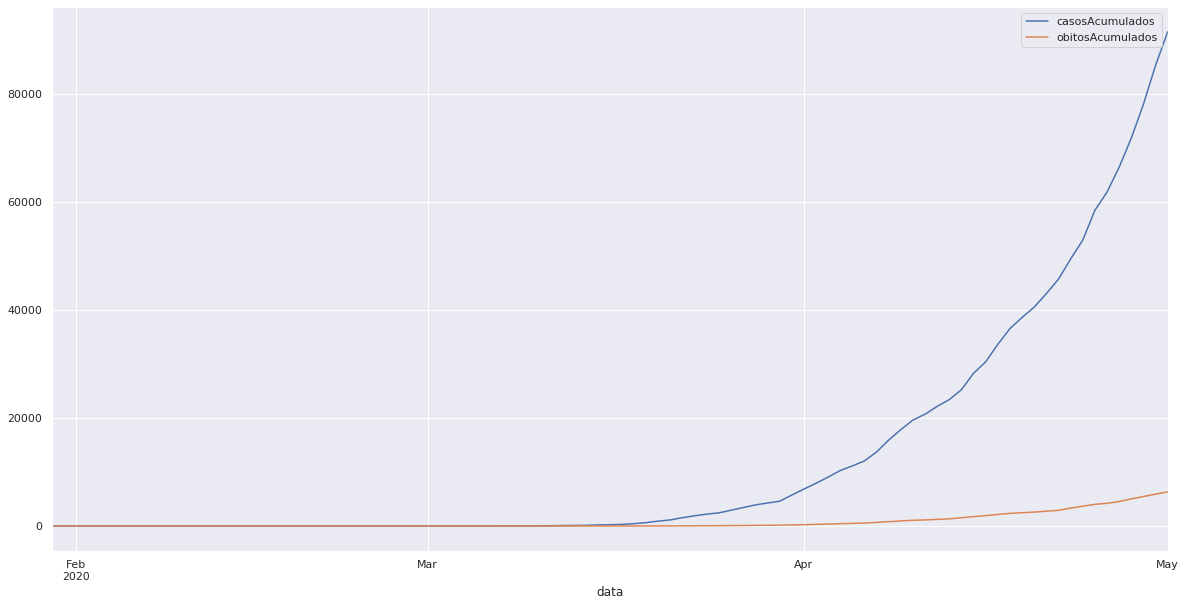

In [6]:
brasil_df[["casosAcumulados", "obitosAcumulados"]].plot()

# Análise de regiões

In [64]:

regioes_df = data_df.groupby(["data","regiao"]).sum()
regioes_df.tail()

casosNovos  casosAcumulados  obitosNovos  \
data       regiao                                                   
2020-05-01 Centro-Oeste         166             2855            0   
           Nordeste            1852            26370          107   
           Norte               1085            11857           84   
           Sudeste             2694            45137          222   
           Sul                  412             5370           15   

                         obitosAcumulados  
data       regiao                          
2020-05-01 Centro-Oeste                79  
           Nordeste                  1643  
           Norte                      796  
           Sudeste                   3616  
           Sul                        195

In [70]:
# Indexando apenas pela data
regioes_df = regioes_df.reset_index().set_index("data")
regioes_df

,index,regiao,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
data,,,,,,
2020-01-30,0,Centro-Oeste,0,0,0,0
2020-01-30,1,Nordeste,0,0,0,0
2020-01-30,2,Norte,0,0,0,0
2020-01-30,3,Sudeste,0,0,0,0
2020-01-30,4,Sul,0,0,0,0
...,...,...,...,...,...,...
2020-05-01,460,Centro-Oeste,166,2855,0,79
2020-05-01,461,Nordeste,1852,26370,107,1643
2020-05-01,462,Norte,1085,11857,84,796


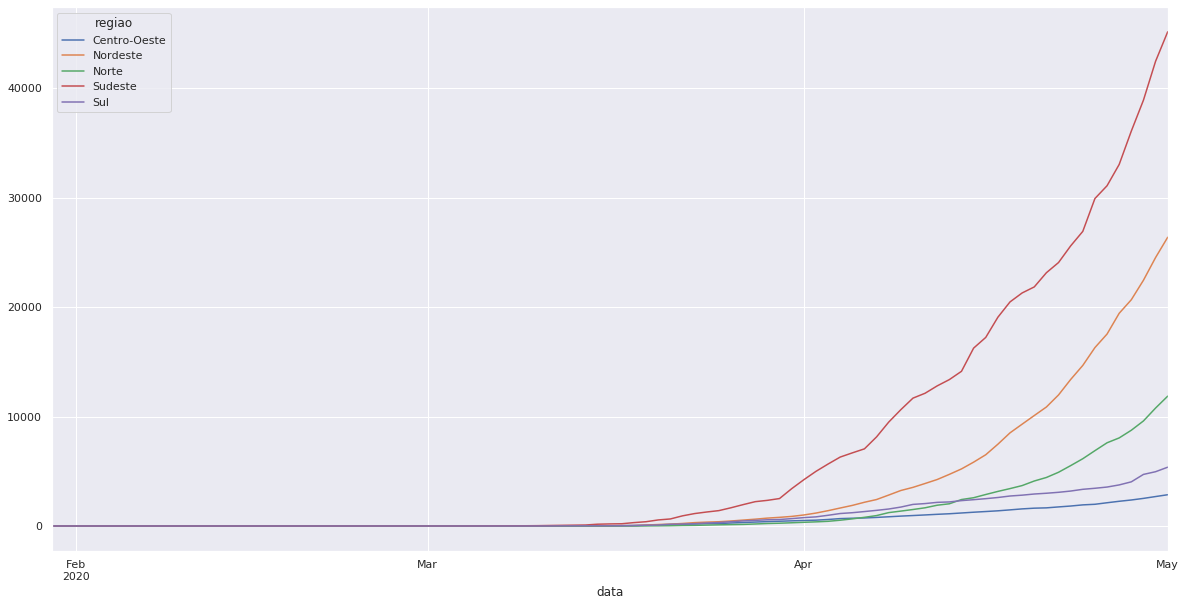

In [72]:
final_reg_df = regioes_df.pivot(columns="regiao")
final_reg_df["casosAcumulados"].plot()

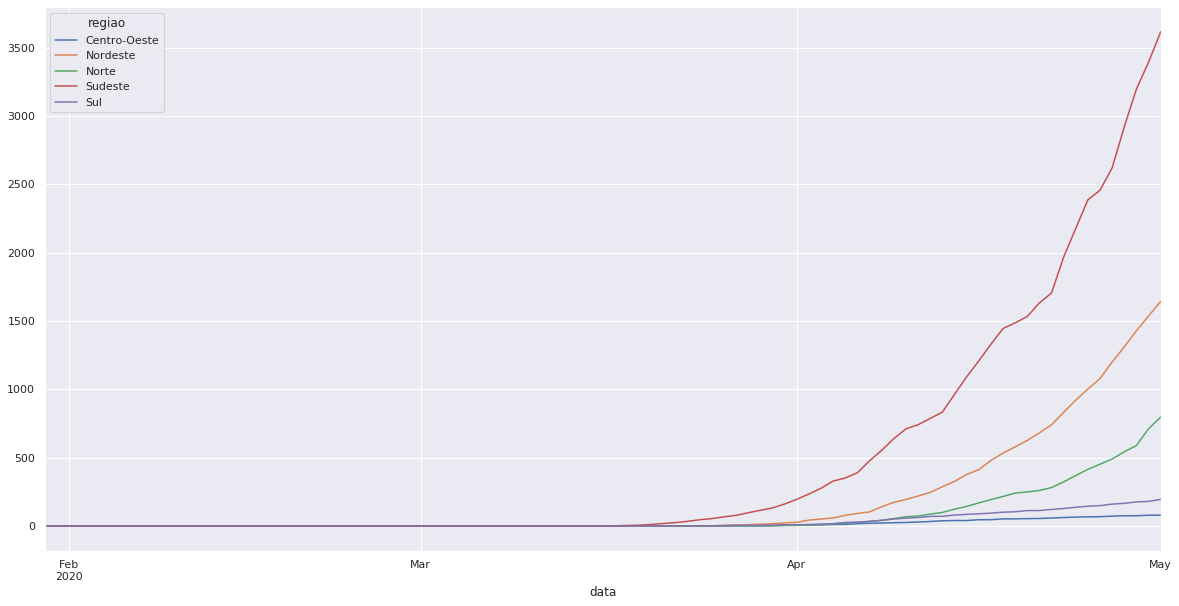

In [86]:
final_reg_df["obitosAcumulados"].plot()

# Análise de estados

In [82]:
estados_df = data_df.set_index("data").pivot(columns="estado")

regiao                                                            \
estado         AC        AL     AM     AP        BA        CE            DF   
data                                                                          
2020-04-27  Norte  Nordeste  Norte  Norte  Nordeste  Nordeste  Centro-Oeste   
2020-04-28  Norte  Nordeste  Norte  Norte  Nordeste  Nordeste  Centro-Oeste   
2020-04-29  Norte  Nordeste  Norte  Norte  Nordeste  Nordeste  Centro-Oeste   
2020-04-30  Norte  Nordeste  Norte  Norte  Nordeste  Nordeste  Centro-Oeste   
2020-05-01  Norte  Nordeste  Norte  Norte  Nordeste  Nordeste  Centro-Oeste   

                                             ... obitosAcumulados           \
estado           ES            GO        MA  ...               PR   RJ  RN   
data                                         ...                             
2020-04-27  Sudeste  Centro-Oeste  Nordeste  ...               75  677  45   
2020-04-28  Sudeste  Centro-Oeste  Nordeste  ...               77  738  48   
2020-04-29  Sudeste  Centro-Oeste  Nordeste  ...               82  794  53   
2020-04-30  Sudeste  Centro-Oeste  Nordeste  ...               83  854  56   
2020-05-01  Sudeste  Centro-Oeste  Nordeste  ...               89  921  56   

                                        
estado      RO RR  RS  SC  SE    SP TO  
data                                    
2020-04-27  10  4  42  43  10  1825  2  
2020-04-28  11  6  45  44  11  2049  2  
2020-04-29  15  6  50  44  12  2247  3  
2020-04-30  16  7  51  46  12  2375  3  
2020-05-01  18  8  58  48  14  2511  3  

[5 rows x 135 columns]

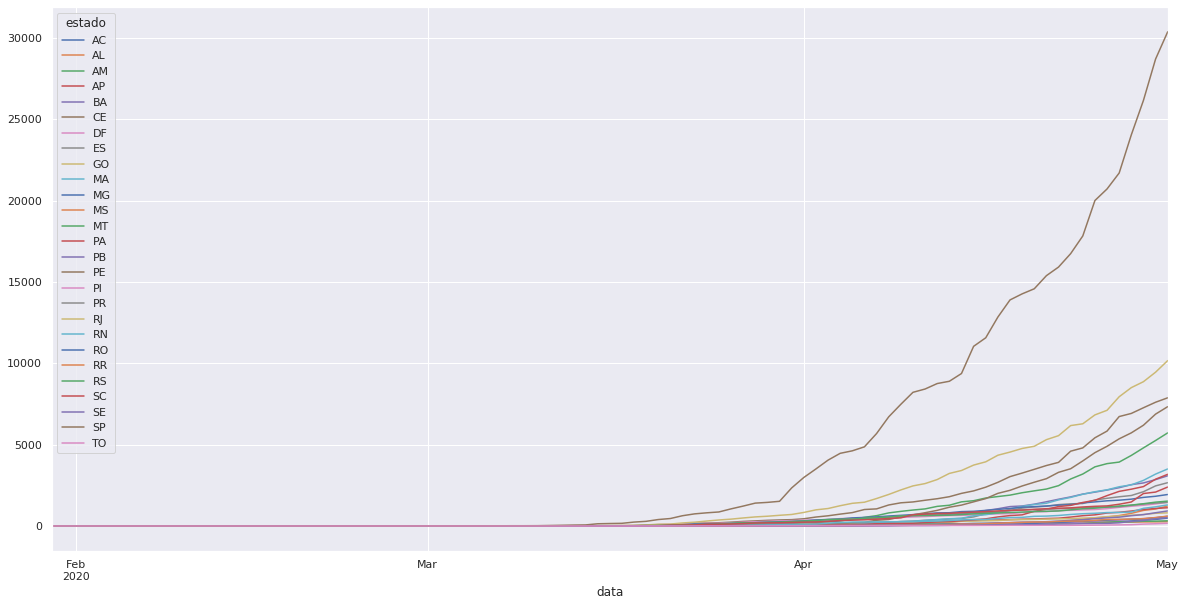

In [83]:
estados_df["casosAcumulados"].plot()

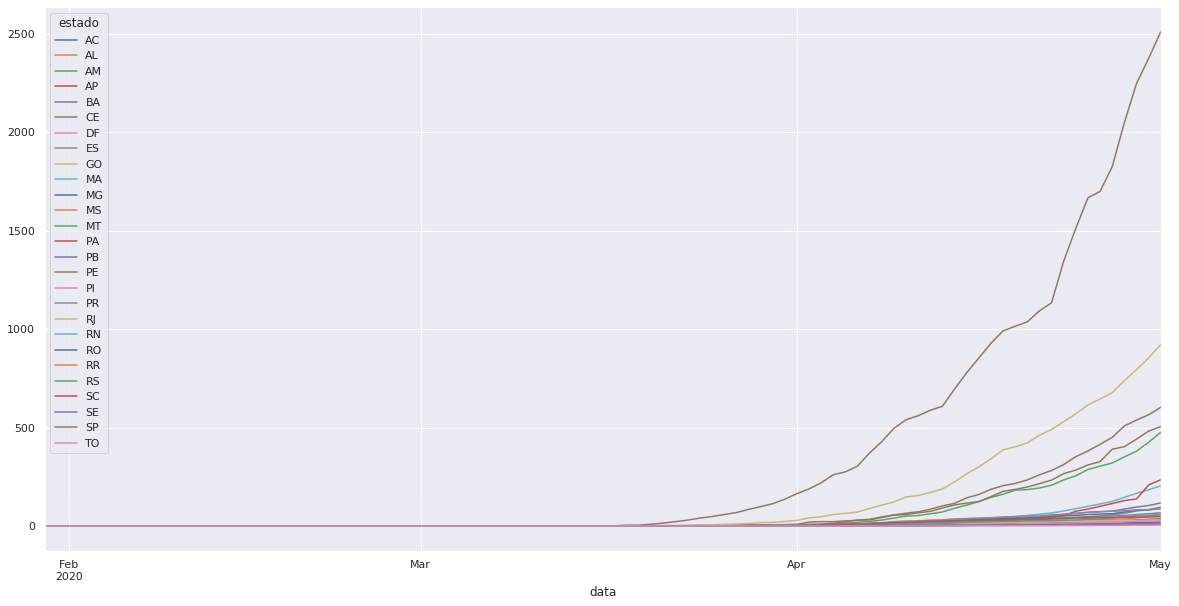

In [85]:
estados_df["obitosAcumulados"].plot()


In [ ]:
# TODO exportar para tratados como planilha excel